# ¡Hola Denisse! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Buen trabajo Denisse! Has completado correctamente todo lo necesario del notebook, realizaste un gran trabajo aplicando los conocimientos de analítica necesarios, se nota que los manejas muy bien. No tengo comentarios de corrección, tu proyecto está aprobado. Felicitaciones por completar el notebook en la primera revisión, mucho éxito en el siguiente sprint!

Saludos!

</div>

----

In [183]:
#Cargar librerías
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
#Cargar dataset
df_games = pd.read_csv('/datasets/games.csv')

In [185]:
#Conocer dataframe
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [186]:
#Imprimir una muestra del dataframe
print(df_games.sample(10))

                                                 Name Platform  \
11353                                    RTX Red Rock      PS2   
15285  Jissen Pachi-Slot Hisshouhou! Mister Magic Neo      PS2   
1694                          Destiny: The Taken King     XOne   
6522                              Legaia 2: Duel Saga      PS2   
12198                                    World Racing       XB   
56                              Super Mario All-Stars     SNES   
13499                       Art of Fighting Anthology      PS2   
6589                                    Madden NFL 08       DS   
11679                          Team Elimination Games      Wii   
4566               Sin and Punishment: Star Successor      Wii   

       Year_of_Release         Genre  NA_sales  EU_sales  JP_sales  \
11353           2003.0       Shooter      0.04      0.03      0.00   
15285           2007.0          Misc      0.00      0.00      0.02   
1694            2015.0       Shooter      0.85      0.23      0

PLAN DE TRABAJO "Preparar los datos":
1. Cambiar los nombres de las columnas a formato snake_case.
2. Convertir la columna 'Year_of_Release' a tipo 'Int64' para eliminar los ceros.
3. Convertir la columna 'User_Score' a tipo flotante. Reemplazar los valores tbd por valores perdidos númericos (NaN).
4. Multiplicar por 10 los valores de la columna 'User_Score' para estandarizar los valores de ambas críticas. ('User_Score' y 'User_Score').
5. Eliminar los valores ausentes de la columna 'Name'(2 filas).
6. Eliminar los valores ausentes de la columna 'Genre'(2 filas).
7. Eliminar los valores ausentes de la columna 'Year_of_Release' (269 filas).
8. Detectar y eliminar valores duplicados.
9. Crear una nueva columna que contenga la suma de las ventas de todas las regiones.
10. Crear una nueva columna que contenga la agrupación de los datos de la columna 'platform'por marca.
11. Cambiar los valores de la columna 'rating' a valores más descriptivos que faciliten su comprension.

In [187]:
#Cambiar los nombres de las columnas a formato snake_case.
df_games.columns = [column_name.lower() for column_name in df_games.columns]
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [188]:
#Convertir la columna 'Year_of_Release' a tipo 'Int64' para eliminar los ceros.
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')
df_games.info()
print(df_games['year_of_release'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB
0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: Int64


In [189]:
#Convertir la columna 'User_Score' a tipo float. Reemplazar los valores tbd por valores perdidos númericos (NaN).
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
print(df_games.dtypes)
print(df_games['user_score'].sample(5))

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object
11202    NaN
2870     4.0
7176     5.6
3916     7.3
651      NaN
Name: user_score, dtype: float64


Decidí cambiar los valores tbd por valores ausentes númericos para poder hacer el cambio a tipo float, debido a que 'to be determined' quiere decir que aún no tenemos una puntuación.

In [190]:
#Multiplicar por 10 los valores de la columna 'User_Score'.
df_games["user_score"] = df_games["user_score"] * 10
print(df_games[["critic_score","user_score"]].sample(5))

       critic_score  user_score
657            73.0         NaN
1713            NaN         NaN
5057           77.0        71.0
10399          60.0        65.0
16436          49.0         NaN


In [191]:
#Eliminar los valores ausentes de las columnas 'name', 'genre' y 'year_of_release'.
df_games = df_games.dropna(subset = ["name", "genre", "year_of_release"])
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Decidí eliminar los datos ausentes de las columnas 'name', 'genre' y 'year_of_release' pues, la cantidad de datos faltantes es pequeña.
No eliminé los valores ausentes de las columnas 'critic_score' y 'user_score', pues estos representan que aún no han sido calificados.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Bien hecho con la gestión de los valores ausentes. En los casos donde hay demasiados en una columna, me parece bien dejar los nulos tal como están o reemplazarlos por algún valor identificable. En este caso, para critic_score y user_score, no hay data suficiente para hacer una imputación adecuada y en caso de rellenar con la media o mediana, se introduce un sesgo muy fuerte en la data, por lo que no es adecuado.



</div>

In [192]:
#Detectar y eliminar valores duplicados.
df_games = df_games.drop_duplicates(subset = ["name","platform","year_of_release","genre"])
df_games.duplicated(subset = ["name","platform","year_of_release","genre"]).sum()

0

In [193]:
#Crear columna que contenga la suma de las ventas de todas las regiones.
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_games.info()
print(df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sample(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
       na_sales  eu_sales  jp_sales  other_sales  total_sales
14487      0.00      0.00      0.03         0.00         0.03
14468      0.00      0.00      0.03         0.00         0.03

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien, la suma de la venta en todas las regiones está correcta

</div>

In [194]:
#Crear columna que contenga la agrupación de los datos de la columna 'platform'por marca.
def func_plataform (x):
    if x in ["3DS","DS","GB","GBA","GC","N64","NES","SNES","Wii","WiiU"]:
        return "Nintendo"
    elif x in ["PC","PCFX"]:
        return "PC"
    elif x in ["PS","PS2","PS3","PS4","PSP","PSV"]:
        return "PlayStation"
    elif x in ["X360","XB","XOne"]:
        return "XBox"
    else:
        return "Other"

df_games["platform_by_brand"] = df_games["platform"].apply(func_plataform)
df_games["platform_by_brand"].value_counts(normalize = True) * 100

PlayStation    40.357599
Nintendo       37.517485
XBox           13.878246
PC              5.826187
Other           2.420483
Name: platform_by_brand, dtype: float64

In [195]:
#Cambiar los valores de la columna 'rating' por valores descriptivos.
def func_rating (x):
    if x == "E" or x == "K-A":
        return "Everyone"
    elif x == "T":
        return "Teens"
    elif x == "M":
        return "Mature"
    elif x == "E10+":
        return "Everyone 10y+"
    elif x == "EC":
        return "Early Childhood"
    elif x == "RP":
        return "Pending"
    elif x == "AO":
        return "Adults Only"
    else:
        return "Pending"

df_games["rating"] = df_games["rating"].apply(func_rating)
df_games["rating"].value_counts()

Pending            6677
Everyone           3923
Teens              2905
Mature             1536
Everyone 10y+      1393
Early Childhood       8
Adults Only           1
Name: rating, dtype: int64

In [196]:
#Acomodar columnas.
df_games = df_games.reindex(columns=['name', 'platform', 'platform_by_brand', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating'])

In [197]:
#Imprimir una muestra del dataframe limpio
print(df_games.sample(5))

                                                    name platform  \
473                                             NBA 2K13     X360   
15494                                         Timmy Time       DS   
16598  Shutsugeki! Otometachi no Senjou 2: Ikusabana ...      PSP   
3219                        Ghostbusters: The Video Game     X360   
7857                                     Dante's Inferno      PSP   

      platform_by_brand  year_of_release     genre  na_sales  eu_sales  \
473                XBox             2012    Sports      2.60      0.20   
15494          Nintendo             2011    Action      0.00      0.02   
16598       PlayStation             2011  Strategy      0.00      0.00   
3219               XBox             2009    Action      0.43      0.14   
7857        PlayStation             2010    Action      0.12      0.03   

       jp_sales  other_sales  total_sales  critic_score  user_score    rating  
473        0.01         0.19         3.00          88.0     

Analisis de datos
-Cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
-¿Cómo varían las ventas de una plataforma a otra?. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.
- Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
-Determina para qué período debes tomar datos.(objetivo: construir un modelo para 2017).
-Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
-¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
-Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
-Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
-Compara las ventas de los mismos juegos en otras plataformas.(Basandote en tus conclusiones).
-Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

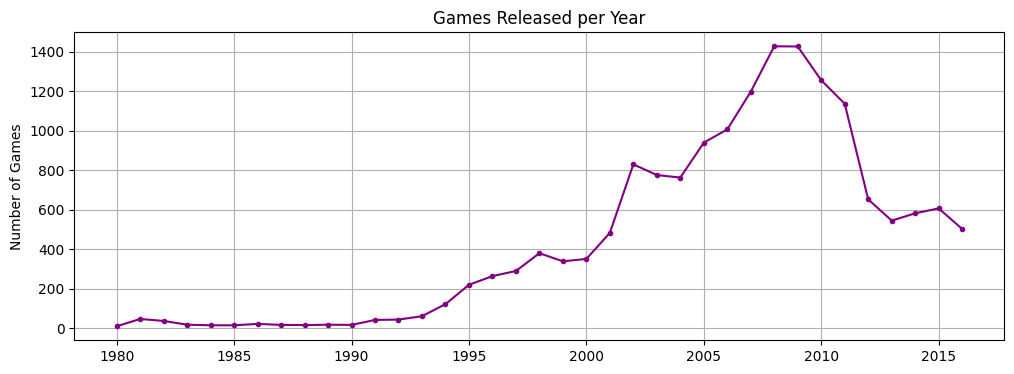

In [198]:
#Cuántos juegos fueron lanzados en diferentes años. 
#Contar juegos por año.
games_per_year = df_games.groupby('year_of_release')['name'].count()
#print(games_per_year)
#Gráficar juegos por año.
games_per_year.plot(
    xlabel = "",
    ylabel="Number of Games",
    title="Games Released per Year",
    figsize = [12,4],
    grid = True,
    marker = ".",
    color = "purple"
)

plt.show()

CONCLUSIONES:
¿Son significativos los datos de cada período?

-Los primeros años no son estadísticamente significativos (1980–1990) tienen pocos registros, por lo que serán de mucha utilidad para analizar tendencias generales de la industria.

-A partir de los años 1990, se pude observar el crecimiento pues, se mejoraron las herramientas de desarrollo y debido a la accesibilidad a las consolas.

-Despues del 2005 podemos ver un crecimiento exponencial gracias a la globalización del desarrollo de videojuegos.

-Llegando al auge en 2008 y 2009 podemos ver una caída que demuestra la transición tecnológica, la crisis economica mundial y el aumento de ciclos de desarrollo más prolongados.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor     </b> <a class="tocSkip"></a>

Bien, correcto. El gráfico es claro, hubo un peak a fines de los 2000 y luego ha caido a niveles similares a los de inicios del 2000.

</div>

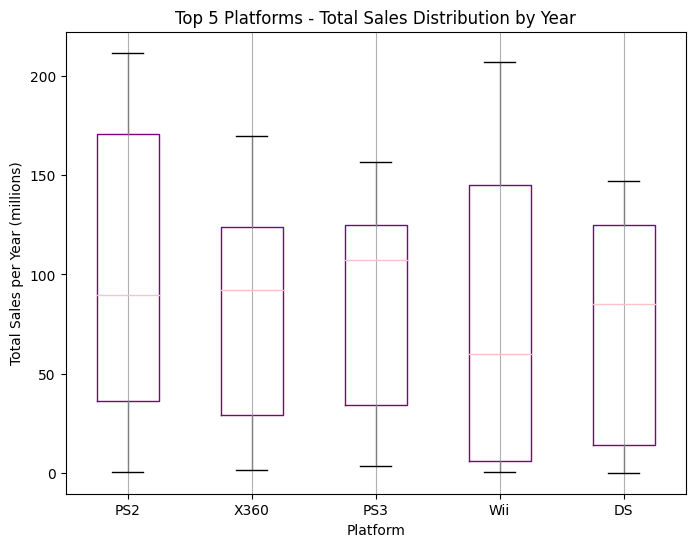

In [199]:
#¿Cómo varían las ventas de una plataforma a otra?.
#Sumar ventas por plataforma

total_sales_per_platform = df_games.pivot_table(
    index = "year_of_release",
    columns = "platform",
    values = "total_sales",
    aggfunc = "sum")
#print(total_sales_per_platform)
#Filtrar solo los años relevantes
#filtered_sales = total_sales_per_platform.loc[1996:2016]
#print(filtered_sales)

#Filtrar las 5 plataformas con más ventas acumuladas
top_five_platforms = total_sales_per_platform.sum().nlargest(5).index

# Diagrama de caja para mostrar la distribución 
plt.figure(figsize=(8, 6))

total_sales_per_platform[top_five_platforms].boxplot(color=dict(boxes='purple', whiskers='gray', medians='pink', caps='black'))

plt.title("Top 5 Platforms - Total Sales Distribution by Year")
plt.xlabel("Platform")
plt.ylabel("Total Sales per Year (millions)")
plt.grid(axis='y', alpha=0.3)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>


Ok, pero ojo que las ventas totales por año no son tan interesantes como distribución, ya que son pocos datos (a lo más 6 o 7)


</div>

CONCLUSIONES:
-Entre las 5 plataformas más vendidas estan 2 de la marca playstation, 2 de la marca Nintendo y 1 de la marca Xbox, siendo Nintendo y Playstation las marcas más populares a lo largo de los años.
-Las medianas de ventas difieren significativamente entre plataformas, lo que refleja distintos niveles de desempeño a lo largo de los años.
-Nintendo Wii y Playstation PS2 muestran mayores ventas promedio anuales, posicionandolos como las marcas dominantes en el mercado. 

In [200]:
#Busca las plataformas que solían ser populares pero que ahora no tienen ventas.
#Encontrar el último año con ventas > 0 para cada plataforma.
last_sales_year = (total_sales_per_platform > 0).apply(lambda x: x[::-1].idxmax())
#print(last_sales_year)
#Filtrar por plataformas que ya no tienen ventas recientes
inactive_platforms = last_sales_year[last_sales_year < 2014]
#print(inactive_platforms)
#Filtrar las que fueron populares
inactive_popular_platforms = total_sales_per_platform.sum()[inactive_platforms.index]
inactive_popular_platforms = inactive_popular_platforms[inactive_popular_platforms > 50]  #vendieron más de 50 millones
print(inactive_popular_platforms)
#Filtrar solo las 3 más populares
top_three_inactive_popular = inactive_popular_platforms.sort_values(ascending=False).head(3)
print(top_three_inactive_popular)


platform
2600      86.48
DS       802.78
GB       254.43
GBA      312.88
GC       196.73
N64      218.01
NES      251.05
PS       727.58
PS2     1233.56
SNES     200.04
XB       251.57
dtype: float64
platform
PS2    1233.56
DS      802.78
PS      727.58
dtype: float64


CONCLUSIONES:
Las plataformas de Playstation y Nintendo llegaron a ser las más populares, pero pierden auge una vez que entra una versión más novedosa y actualizada.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>


Correcto, bien con determinar estas plataformas y refinar la selección en base a la cantidad de ventas.


</div>

In [201]:
#¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
#Calcular los años de inicio y final de actividad por plataforma.
platform_lifecycle = df_games.groupby('platform')['year_of_release'].agg(["min", "max"]).sort_values("min")
platform_lifecycle.columns = ['first_year', 'last_year']
platform_lifecycle["life_span"] = platform_lifecycle["last_year"] - platform_lifecycle["first_year"]
#print(platform_lifecycle.head(15))
#¿Cuánto tardan generalmente las nuevas plataformas en aparecer?
#Sacar promedio de tiempo entre nuevas plataformas.
time_between_new_platform = platform_lifecycle['first_year'].sort_values().diff().dropna().mean()*10
print(f'El tiempo promedio entre la aparición de nuevas plataformas es de:', time_between_new_platform, 'años.')
#¿Cuánto tardan generalmente las nuevas plataformas en desaparecer?
#Sacar promedio del tiempo de vida.
avg_lifetime = platform_lifecycle["life_span"].mean()
print(f'La duración promedio de una plataforma:', avg_lifetime,'años.')

El tiempo promedio entre la aparición de nuevas plataformas es de: 11.0 años.
La duración promedio de una plataforma: 7.612903225806452 años.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho! Muy bien con la aplicación de agrupaciones para encontrar los primeros y últimos años de cada consola. Así, tenemos una medida precisa de sus años de vida de uso.

</div>

CONCLUSIONES:
El mundo de las plataformas para videojuegos esta en constante actualización y competencia para permanecer en el mercado, el tiempo promedio en el que surgen nuevas consolas es bastante rápido gracias a los avances en la tecnologia. 
Las plataformas permanecen activas un promedio de 7 a 8 años antes de ser reemplazadas por una nueva generación que ofrece mejoras y avances muy llamativos para el consumidor.

In [202]:
#Determina para qué período debes tomar datos. Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
# Seleccionar información a partir del año 2000.
df_games = df_games.query("year_of_release >= 2000")
total_sales_per_platform = df_games.pivot_table(
    index = "year_of_release",
    columns = "platform",
    values = "total_sales",
    aggfunc = "sum")


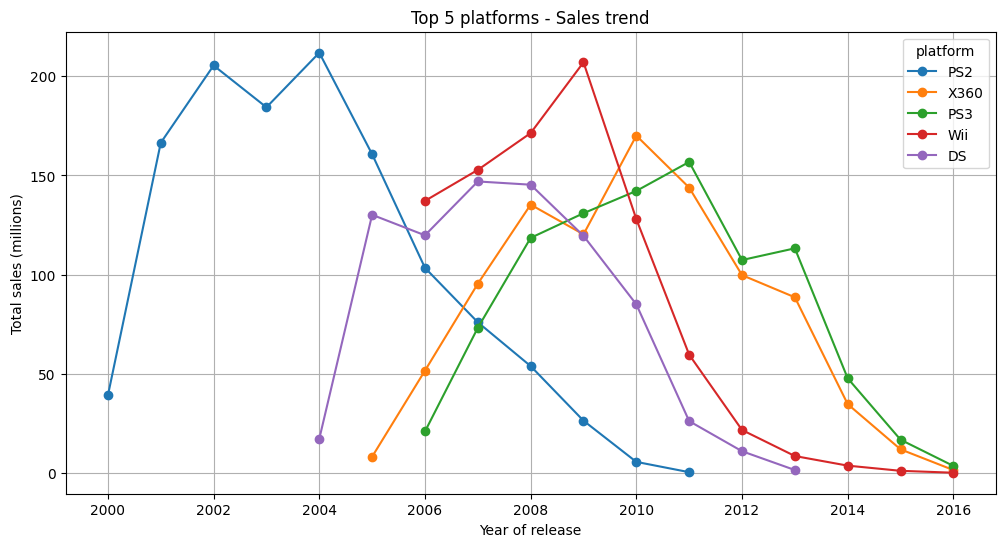

In [203]:
#¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
#Identificar las plataformas líderes en ventas 
filtered_top_sales = total_sales_per_platform[top_five_platforms]
#Gráficar la tendencia d las ventas
filtered_top_sales.plot(
    kind="line",
    figsize=(12, 6),
    marker="o",
    grid=True,
    title="Top 5 platforms - Sales trend"
)
plt.xlabel("Year of release")
plt.ylabel("Total sales (millions)")
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Excelente, muy buen gráfico, permite apreciar el periodo de vida de cada consola, incluyendo su auge y luego caída.

</div>

CONCLUSIONES:
-A partir del año 2000 PS2 fue la consola líder en el mercado y su trayectoria se mantuvo hasta el 2011, los años en los que era la consola mas popular fueron 2000 al 2004, mostrando una fuerte tendencia negativa, reflejando su salida gradual del mercado y la entrada y popularización del Nintendo DS (consola más popular de 2004 a 2005), y las demás consolas populares que iban llegando al mercado.
-Las plataformas PS3 y Xbox 360 y Wii presentan una pendiente positiva, lo que indica un crecimiento sostenido de las ventas en los años 2003 al 2001, sin embargo, todas muestran una tendencia negativa despues del auge, lo que sugiere una transición generacional clara, donde las nuevas consolas reemplazan a las anteriores, concentrando el crecimiento de ventas en las plataformas más recientes.

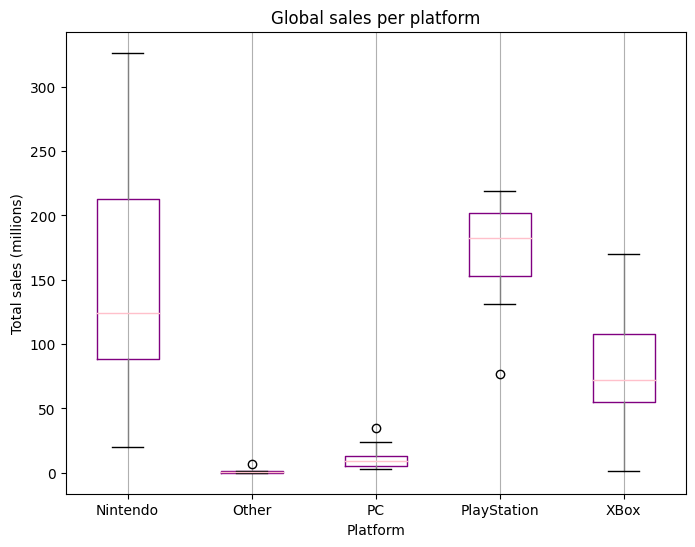

In [204]:
#Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

#Sumar ventas globales de todos los juegos por plataforma

global_sales_per_platform = df_games.pivot_table(
    index = "year_of_release",
    columns = "platform_by_brand",
    values = "total_sales",
    aggfunc = "sum")
#print(global_sales_per_platform)

# Diagrama de caja para mostrar la distribución 
plt.figure(figsize=(8, 6))

global_sales_per_platform.boxplot(color=dict(boxes='purple', whiskers='gray', medians='pink', caps='black'))

plt.title("Global sales per platform")
plt.xlabel("Platform")
plt.ylabel("Total sales (millions)")
plt.grid(axis='y', alpha=0.3)
plt.show()



CONCLUSIONES:
-Si existen diferencias significativas entre las ventas de las distintas plataformas.
-Nintendo muestra tener años con ventas excepcionales mayores a las otras marcas.
-Las consolas de las marcas Playstation y Nintendo muestran ventas promedio más altas y variables, lo que indica un grupo de usuarios amplio y títulos con mayor éxito comercial.
-Mientras que Xbox muestra ventas promedio más bajas que sugieren una participación en el mercado más limitada.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Correcto los boxplots, interesante el análisis por marca de consola.



</div>

total_sales     1.000000
critic_score    0.255960
user_score      0.085812
Name: total_sales, dtype: float64


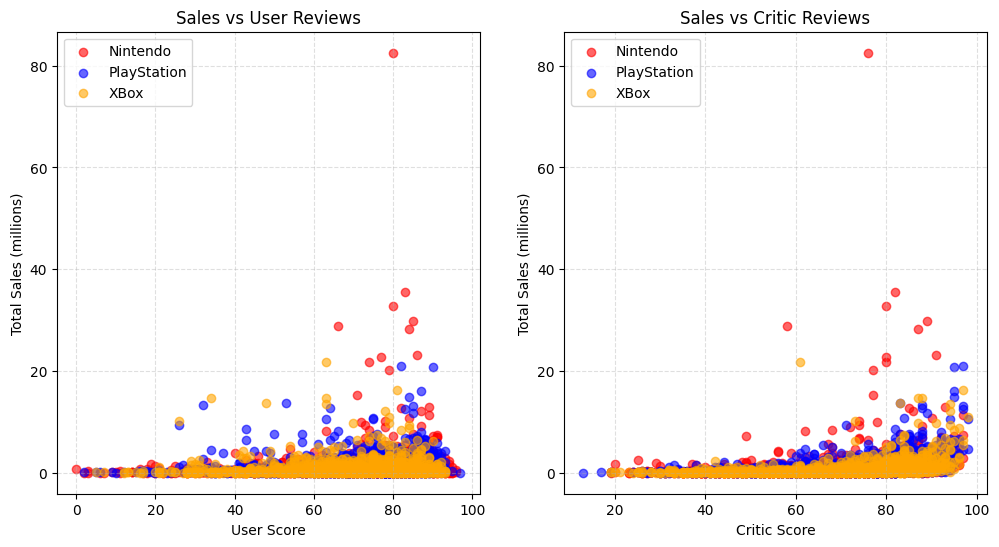

In [205]:
#Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección).
# Filtrar plataformas populares
top_plataforms = ['Nintendo','PlayStation','XBox']
df_games_top = df_games.query('platform_by_brand == @top_plataforms')
#print(df_games.head(10))
#Crea un gráfico de dispersión
plt.figure(figsize=(12, 6))
colors = {
    'Nintendo': 'red',
    'PlayStation': 'blue',
    'XBox': 'orange'
}
#Reseñas de usuarios vs ventas
plt.subplot(1, 2, 1)
for brand in top_plataforms:
    subset = df_games_top[df_games_top['platform_by_brand'] == brand]
    plt.scatter(
        subset['user_score'], 
        subset['total_sales'], 
        alpha=0.6, 
        label=brand, 
        color=colors[brand]
    )

plt.title("Sales vs User Reviews")
plt.xlabel("User Score")
plt.ylabel("Total Sales (millions)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()

#Reseñas de críticos vs ventas
plt.subplot(1, 2, 2)
for brand in top_plataforms:
    subset = df_games_top[df_games_top['platform_by_brand'] == brand]
    plt.scatter(
        subset['critic_score'], 
        subset['total_sales'], 
        alpha=0.6, 
        label=brand, 
        color=colors[brand]
    )

plt.title("Sales vs Critic Reviews")
plt.xlabel("Critic Score")
plt.ylabel("Total Sales (millions)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()

#Calcula la correlación entre las reseñas y las ventas. 
score_sales_cor = df_games_top[["total_sales","critic_score","user_score"]].corr()
print(score_sales_cor["total_sales"])

CONCLUSIONES:
-Se observa un correlación positiva entre las ventas totales y las reseñas tanto de los críticos como de los usuarios,(siendo mucho más positiva la de los críticos).
-Los juegos con puntuaciones más altas tienden a tener mayor éxito en ventas, especialmente en Nintendo y Playstation.
-Existen casos con puntuaciones medias pero con altas ventas, lo que sugiere que en ciertos casos la popularidad de la franquicia o la marca en sí, influyen en las ventas, dejando de lado la crítica.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho con el gráfico y el cálculo del coeficiente. Permite obtener una visión general de la correlación entre ambas variables.

</div>

Text(0.5, 0.98, 'Sales Performance:Same titles vs Top Platforms')

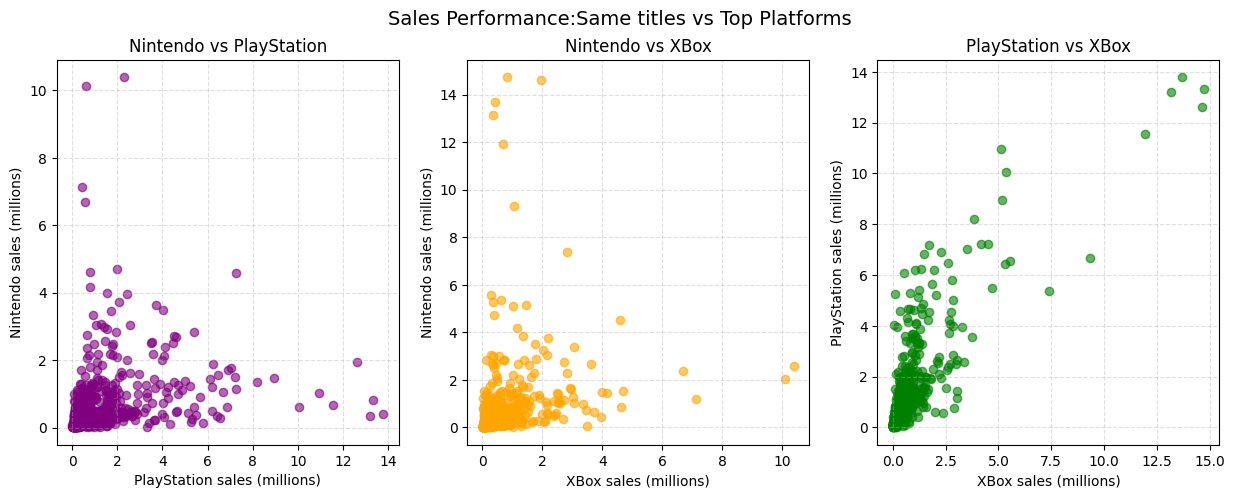

In [206]:
#Compara las ventas de los mismos juegos en otras plataformas.

#Agrupar las ventas por nombre de juego y plataforma.

sales_by_game_platform = df_games_top.pivot_table(
    index = 'name',
    columns = 'platform_by_brand',
    values = 'total_sales',
    aggfunc =  'sum'
)

# Filtrar plataformas populares
top_plataforms = ['Nintendo','PlayStation','XBox']
sales_by_game_platform = sales_by_game_platform[top_plataforms]
#print(sales_by_game_platform.head(30))
#Eliminar juegos que no existen en todas las plataformas
sales_by_game_platform = sales_by_game_platform.dropna()
#Crear gráfico de disperción para comparar entre pares
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
#Nintendo vs Playstation
axes[0].scatter(
    sales_by_game_platform['PlayStation'],
    sales_by_game_platform['Nintendo'],
    alpha=0.6, color='purple'
)
axes[0].set_title('Nintendo vs PlayStation')
axes[0].set_xlabel('PlayStation sales (millions)')
axes[0].set_ylabel('Nintendo sales (millions)')
axes[0].grid(True, linestyle='--', alpha=0.4)

#Nintendo vs Xbox
axes[1].scatter(
    sales_by_game_platform['Nintendo'],
    sales_by_game_platform['XBox'],
    alpha=0.6, color='orange'
)
axes[1].set_title('Nintendo vs XBox')
axes[1].set_xlabel('XBox sales (millions)')
axes[1].set_ylabel('Nintendo sales (millions)')
axes[1].grid(True, linestyle='--', alpha=0.4)

#Playstation vs Xbox
axes[2].scatter(
    sales_by_game_platform['XBox'],
    sales_by_game_platform['PlayStation'],
    alpha=0.6, color='green'
)
axes[2].set_title('PlayStation vs XBox')
axes[2].set_xlabel('XBox sales (millions)')
axes[2].set_ylabel('PlayStation sales (millions)')
axes[2].grid(True, linestyle='--', alpha=0.4)

plt.suptitle('Sales Performance:Same titles vs Top Platforms', fontsize=14)



CONCLUSIONES:
-Playstation y Xbox presentan estar fuertemente correlacionados, lo que indica que ambas marcas comparten títulos y publico similares, mientras que Nintendo revela un patrón ditinto, con varios títulos con grandes ventas exclusivas de sus consolas, lo que demuestra un público más segmentado y mayor exclusividad.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Felicitaciones con este análisis, deja muy clara las comparaciones de ventas entre marcas de consolas. Sería bueno agregar una línea y=x en cada uno, para tener clara la comparación de cuando un juego es mayor en una consola o en la otra.



</div>

genre
Sports          82.54
Action          55.41
Racing          35.52
Platform        29.80
Shooter         29.20
Misc            28.91
Simulation      24.67
Role-Playing    18.24
Puzzle          15.28
Fighting        12.84
Adventure       10.37
Strategy         2.74
dtype: float64


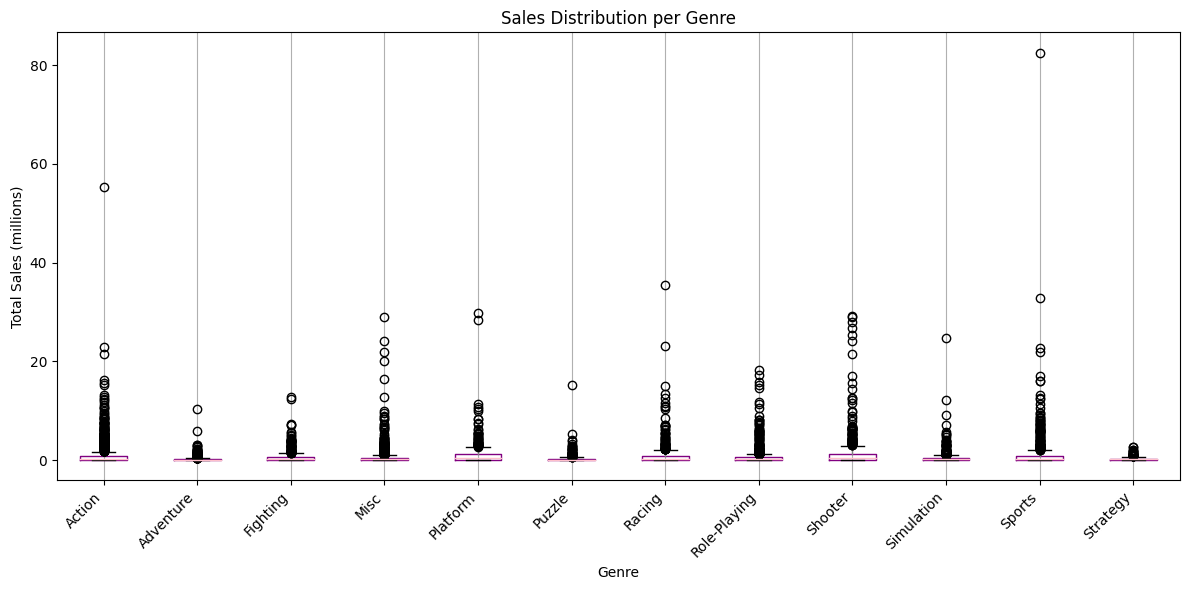

In [207]:
#Visualiza la distribución general de los juegos por género.
#Agrupar las ventas por juegos y genero.

sales_by_genre = df_games_top.pivot_table(
    index = 'name',
    columns = 'genre',
    values = 'total_sales',
    aggfunc =  'sum'
)

print(sales_by_genre.max().sort_values(ascending=False))
# Eliminar géneros con todos los valores nulos
sales_by_genre = sales_by_genre.dropna(how='all', axis=1)

#Diagrama de caja para visualizar la distribución de ventas entre genero.

plt.figure(figsize=(12, 6))
sales_by_genre.boxplot(
    color=dict(boxes='purple', whiskers='gray', medians='pink', caps='black')
)

plt.title("Sales Distribution per Genre")
plt.xlabel("Genre")
plt.ylabel("Total Sales (millions)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



<div class="alert alert-block alert-warning">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien con el gráfico de boxplots, sin embargo, nota que a causa de los outliers no podemos ver la variabilidad de cada consola (las cajas son muy pequeñitas). En este caso se puede realizar el mismo gráfico pero reemplazando la escala normal por una escala logarítmica o agregando un gráfico adicional con la escala normal pero limitada a valores más pequeños (una especie de zoom al gráfico original).

</div>

CONCLUSIONES:
-Los generos Action, Shooter y Sports muestran medianas de ventas más altas y una mayor dispersión, indicando títulos muy exitosos pero también gran variabilidad.
-Los generos Adventure, puzzle y Strategy muestran ventas bajas y consistentes, lo qur refleja mercados más pequeños.
-Con esto puedo conlcuir que los generos de Action, Shooter y Sports son los más rentables pero tambien los más competitivos, así que,  el éxito comercial de la industria de los videojuegos esta altamente vínculado a géneros dinámicos y competitivos.

In [208]:
#Crear un perfil para cada región

#Crear funcion para mostrar las 5 plataformas más vendidas por región


def top_platforms_per_region(df, region_col, top_n=5):
    top_platforms = (
        df_games_top.groupby('platform', as_index=False)[region_col].sum().sort_values(by=region_col, ascending=False).head(top_n)
    )
    top_platforms['region'] = region_col.replace('_sales', '').upper()
    return top_platforms

#Crear funcion para mostrar los 5 generos más populares por región y su rating
def top_genre_per_region(df, region_col, top_n=5):
    top_genre = (
        df_games_top.groupby('genre', as_index=False)[region_col].sum().sort_values(by=region_col, ascending=False).head(top_n)
    )
    top_genre['region'] = region_col.replace('_sales', '').upper()
    # Calcular rating promedio (o más común) por género
    rating_per_genre = (
        df_games_top.groupby('genre')['rating']
        .agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
        .reset_index()
    )
    # Unir ambos resultados
    top_genre = top_genre.merge(rating_per_genre, on='genre', how='left')
    return top_genre

#Calcular datos por región
regions = ['na_sales', 'eu_sales', 'jp_sales']
top_platforms = pd.concat([top_platforms_per_region(df_games_top, r) for r in regions], ignore_index=True)
top_genre = pd.concat([top_genre_per_region(df_games_top, r) for r in regions], ignore_index=True)

print(f'Top 5 plataformas más vendidas por región:')
print(top_platforms)
print(f'Top 5 géneros más populares por región:')
print(top_genre)

Top 5 plataformas más vendidas por región:
   platform  na_sales region  eu_sales  jp_sales
0      X360    595.74     NA       NaN       NaN
1       PS2    572.92     NA       NaN       NaN
2       Wii    486.87     NA       NaN       NaN
3       PS3    390.13     NA       NaN       NaN
4        DS    380.31     NA       NaN       NaN
5       PS2       NaN     EU    332.63       NaN
6       PS3       NaN     EU    327.20       NaN
7      X360       NaN     EU    268.32       NaN
8       Wii       NaN     EU    258.32       NaN
9        DS       NaN     EU    188.41       NaN
10       DS       NaN     JP       NaN    175.00
11      PS2       NaN     JP       NaN    137.54
12      3DS       NaN     JP       NaN    100.62
13      PS3       NaN     JP       NaN     79.41
14      PSP       NaN     JP       NaN     75.88
Top 5 géneros más populares por región:
           genre  na_sales region    rating  eu_sales  jp_sales
0         Action    744.71     NA   Pending       NaN       NaN
1    

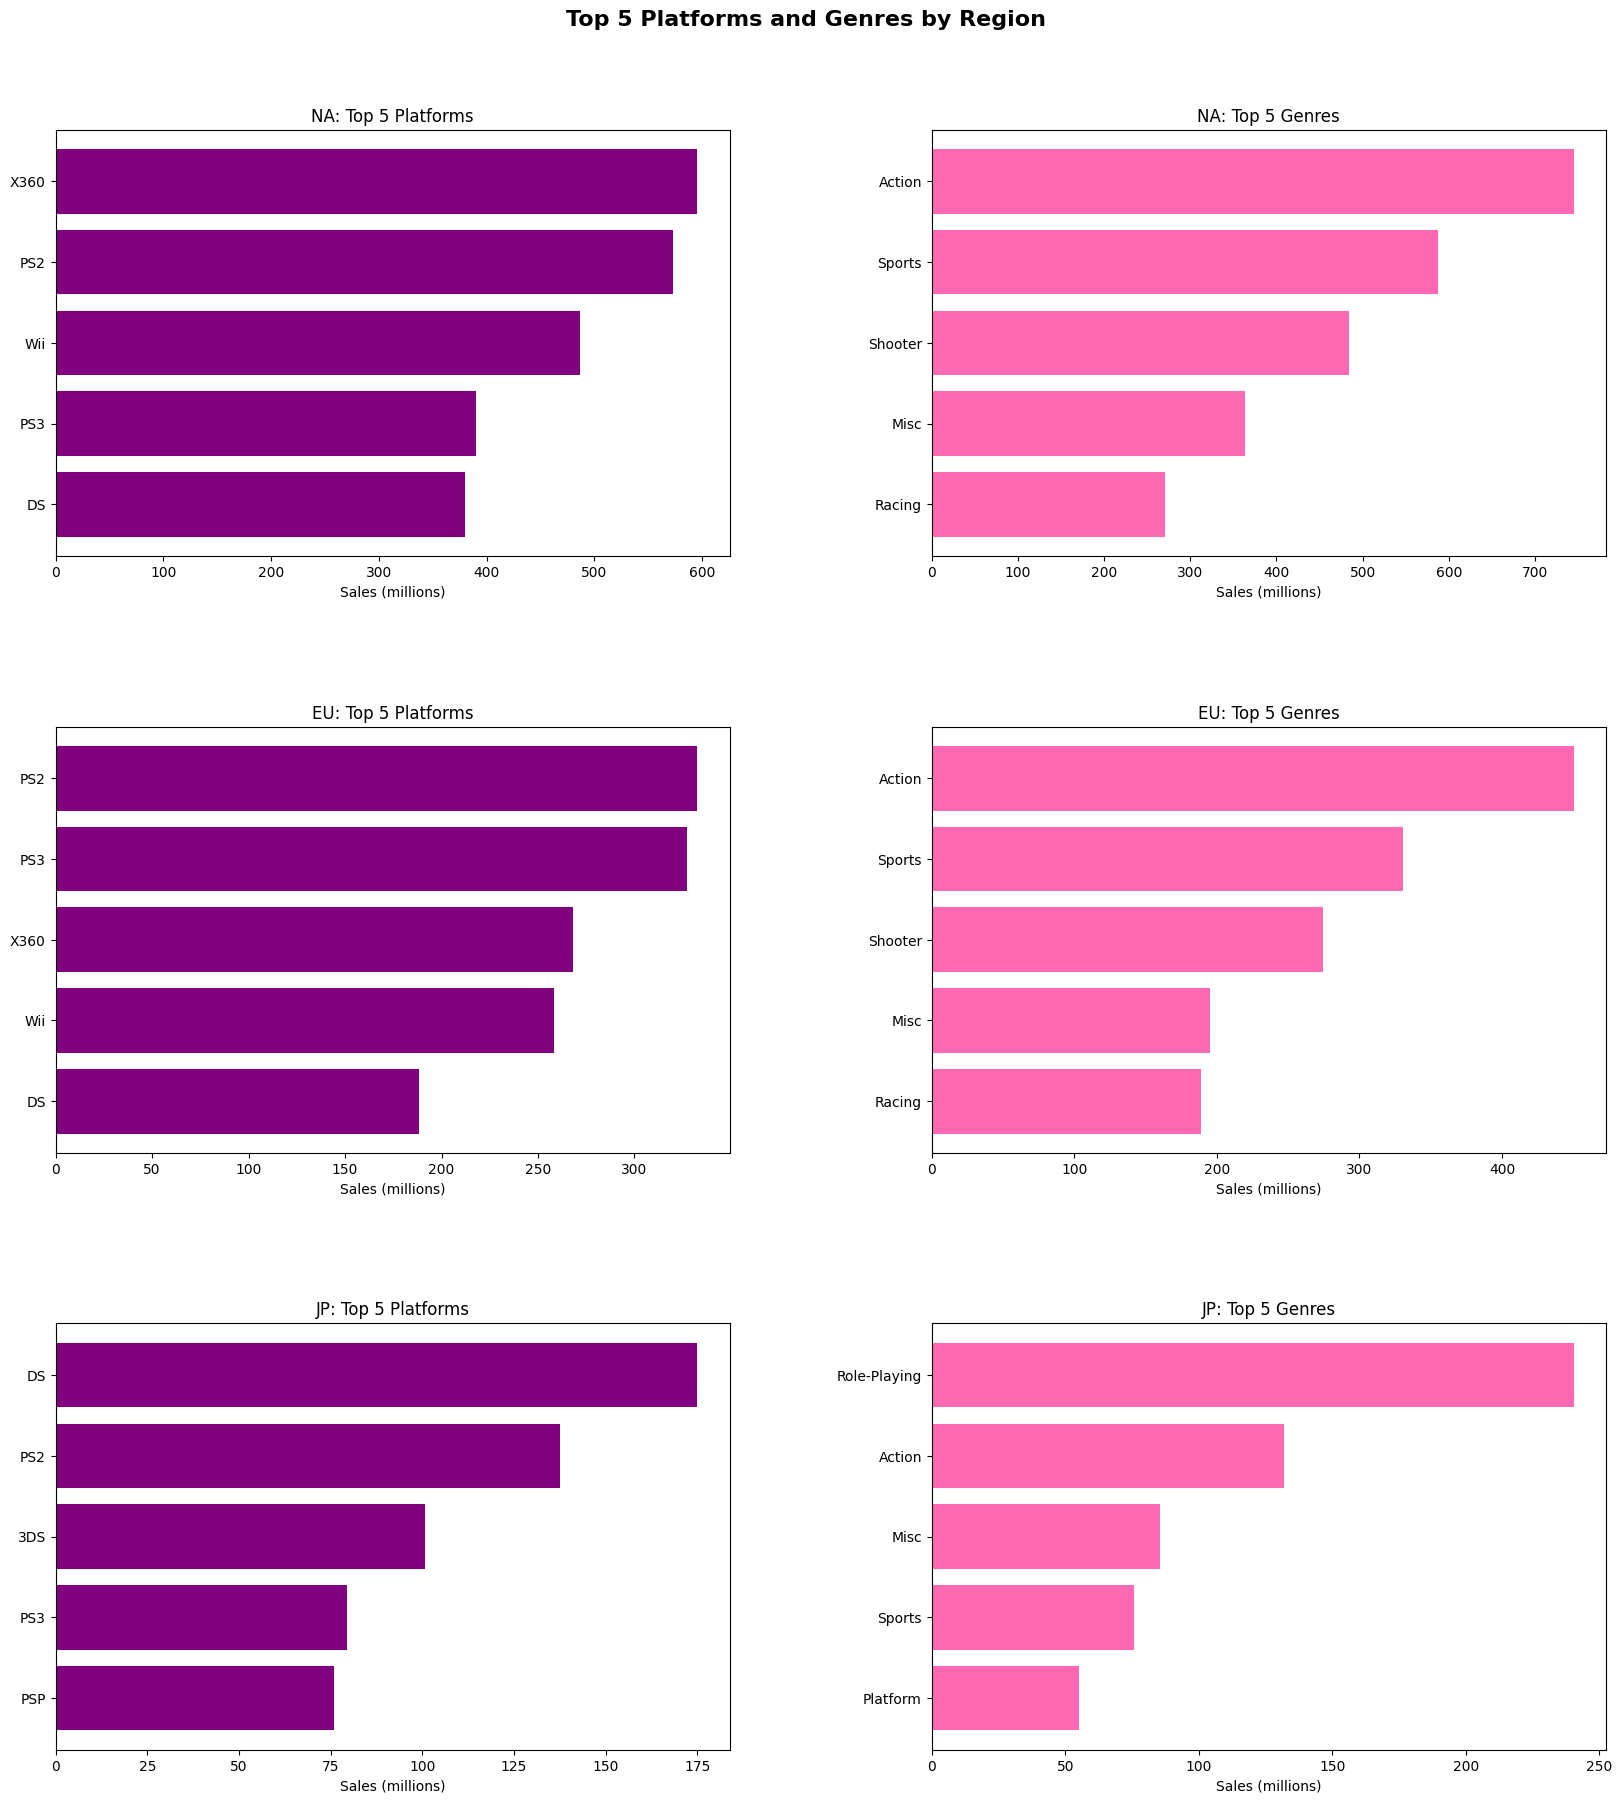

In [209]:
# Conjunto de nombre de región y columna de ventas
region_map = {
    'NA': 'na_sales',
    'EU': 'eu_sales',
    'JP': 'jp_sales'
}

fig, axes = plt.subplots(len(region_map), 2, figsize=(20, 20))

for i, (region_name, sales_col) in enumerate(region_map.items()):
    # Filtrar por región
    platform_data = top_platforms[top_platforms['region'] == region_name]
    genre_data = top_genre[top_genre['region'] == region_name]
    
    #Gráfico 1: Plataformas
    axes[i, 0].barh(
        platform_data['platform'],
        platform_data[sales_col].fillna(0),
        color='purple'
    )
    axes[i, 0].invert_yaxis()
    axes[i, 0].set_title(f"{region_name}: Top 5 Platforms")
    axes[i, 0].set_xlabel("Sales (millions)")
    
    #Gráfico 2: Géneros
    if not genre_data.empty:
        axes[i, 1].barh(
            genre_data['genre'],
            genre_data[sales_col].fillna(0),
            color='hotpink'
        )
        axes[i, 1].invert_yaxis()
        axes[i, 1].set_title(f"{region_name}: Top 5 Genres")
        axes[i, 1].set_xlabel("Sales (millions)")
    else:
        axes[i, 1].set_title(f"{region_name}: No hay datos de géneros")
        axes[i, 1].set_axis_off()

plt.suptitle("Top 5 Platforms and Genres by Region", fontsize=16, fontweight='bold')
plt.subplots_adjust(hspace=0.4, wspace=0.3, top=0.92)
plt.show()



CONLCUSIONES:
-La popularidad de las plataformas y la marca dominante depende altamente de la región en la que se promueve, se puede observar que las preferencias son culturales.  
-Xbox solo es marca número 1 en Norte America pues, es la casa de la marca, en Europa es la número 3 dandole lugar a las otras plataformas, mientras que, en Japón no es nada popular, debido a la preferencia cultural por las empresas japonesas.
-En Norte america los generos de acción, deportes y disparos son los más populares, lo que refleja una cultura que disfruta de la estrategia y la competencia.
-En Europa, por otro lado, la platafoma más popular es el PS2 seguida por el PS3 de la marca Sony, lo que refleja la fuerte presencia de la marca PlayStation en el mercado europeo. Dicho mercado al igual que norte america se inclina por  los generos de acción, deportes y disparo, reflejando la fuerte influencia cultural entre Norteamerica y Europa.
-En Japón, podemos obseervar una alta preferencia por los videojuegos portatiles mostrando como número 1 el DS de la marca Nintendo, y en general en su top 5 se nota la fuerte presencia de las marcas Nintendo y Playstation en el mercado Japones. Los japoneses prefieren los juegos de Rol y accion lo que refleja que culuralmente disfrutan de experiencias más significativas y compromisos a largo plazo.

In [210]:
#Reacomodar el df en formato largo
df_games_long = df_games.melt(
    id_vars=['name', 'platform', 'genre', 'rating'], 
    value_vars=['na_sales', 'eu_sales', 'jp_sales'], 
    var_name='region',
    value_name='sales'
)

# Quitar "_sales" del nombre de región
df_games_long['region'] = df_games_long['region'].str.replace('_sales', '').str.upper()

# Eliminar filas sin ventas
df_games_long = df_games_long.dropna(subset=['sales'])


#Agrupar por rating y region
# Promedio de ventas por rating y región
rating_region_sales = (
    df_games_long.groupby(['rating', 'region'], as_index=False)['sales']
    .mean()
    .sort_values(by=['region', 'sales'], ascending=[True, False])
)

print(rating_region_sales)

             rating region     sales
0       Adults Only     EU  0.610000
12           Mature     EU  0.310585
6          Everyone     EU  0.177990
18            Teens     EU  0.137359
9     Everyone 10y+     EU  0.131703
15          Pending     EU  0.071930
3   Early Childhood     EU  0.013750
16          Pending     JP  0.082542
7          Everyone     JP  0.048946
19            Teens     JP  0.045824
13           Mature     JP  0.038028
10    Everyone 10y+     JP  0.028879
1       Adults Only     JP  0.000000
4   Early Childhood     JP  0.000000
2       Adults Only     NA  1.260000
14           Mature     NA  0.478501
8          Everyone     NA  0.321974
20            Teens     NA  0.248290
11    Everyone 10y+     NA  0.248204
5   Early Childhood     NA  0.191250
17          Pending     NA  0.102829


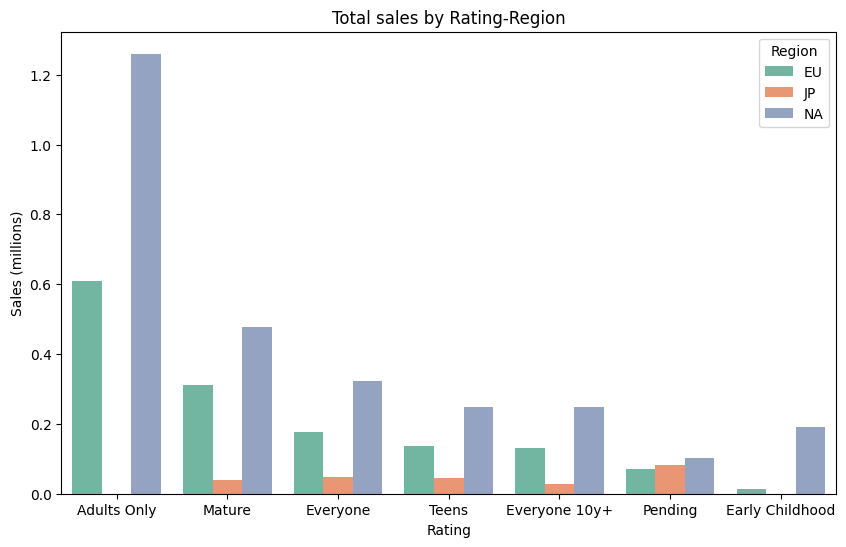

In [211]:
#Gráfico con ventas totales por rating y región
plt.figure(figsize=(10, 6))
sns.barplot(
    data=rating_region_sales,
    x='rating',
    y='sales',
    hue='region',
    palette='Set2'
)

plt.title("Total sales by Rating-Region")
plt.xlabel("Rating")
plt.ylabel("Sales (millions)")
plt.legend(title='Region')
plt.show()

CONCLUSIONES:
¿Las clasificaciones de ESRB afectan a las ventas en regiones individuales?
-El impacto del rating en las ventas varía significativamente por región.
-El mercado occidental (NA, EU) muestra una alta aceptación de juegos con clasificaciones “Mature” y "Adults only".
-Diferente del mercado japonés que, muestra una preferencia por juegos aptos para todo público. 
-Por lo tanto, las estrategias de marketing y lanzamiento deberían adaptarse al perfil demográfico y cultural de cada región.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho, muy bien con la comparación entre las regiones. Es importante revisar diferentes dimensiones entre cada uno, esto revela puntos importantes de segmentación que podrían ser beneficiosos para un modelo de predicción. Por ejemplo, observamos que Japón es muy diferente respecto a las otras regiones en varios aspectos, tal vez esto justifique diferentes modelos o reglas para esta región.
    
</div>

In [212]:
#Las calificaciones promedio de usuarios entre Xbox One y PC son iguales.
alpha = 0.05
from scipy.stats import ttest_ind
#Hipótesis 1: Xbox One vs PC
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
# Quitar valores NaN
df_games = df_games.dropna(subset=['user_score'])
x_one_scores = df_games.loc[df_games['platform'] == 'XOne', 'user_score']
pc_scores = df_games.loc[df_games['platform'] == 'PC', 'user_score']
t_stat_1, p_val_1 = ttest_ind(x_one_scores, pc_scores, equal_var=False, nan_policy='omit')
print(f"Hipótesis 1 (XOne vs PC): t = {t_stat_1:.4f}, p-valor = {p_val_1:.4f}")
if p_val_1 < alpha:
    print("Rechazamos hipotesis nula: las calificaciones promedio entre Xbox One y PC son diferentes.")
else:
    print("No rechazamos hipotesis nula: no hay evidencia de diferencia significativa entre Xbox One y PC.")
    
# Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
#Hipótesis 2: Acción vs Deportes
action_scores = df_games.loc[df_games['genre'] ==  'Action', 'user_score']
sports_scores = df_games.loc[df_games['genre'] ==  'Sports', 'user_score']
t_stat_2, p_val_2 = ttest_ind(action_scores, sports_scores, equal_var=False, nan_policy='omit')
print(f"Hipótesis 2 (Action vs Sports): t = {t_stat_2:.4f}, p-valor = {p_val_2:.4f}")
if p_val_2 < alpha:
    print("Rechazamos hipotesis nula: las calificaciones promedio entre Acción y Deportes son diferentes.")
else:
    print("No rechazamos hipotesis nula: no hay evidencia de diferencia significativa entre las calificaciones de los usuarios de los géneros Acción y Deportes")


Hipótesis 1 (XOne vs PC): t = -4.3909, p-valor = 0.0000
Rechazamos hipotesis nula: las calificaciones promedio entre Xbox One y PC son diferentes.
Hipótesis 2 (Action vs Sports): t = 1.6169, p-valor = 0.1060
No rechazamos hipotesis nula: no hay evidencia de diferencia significativa entre las calificaciones de los usuarios de los géneros Acción y Deportes


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho con los tests, fueron realizados de forma correcta. 

Es importante mencionar que el t-test asume que las dos muestras tienen varianzas iguales Para verificar esa igualdad de varianzas podemos usar el **test de Levene**. Este nos dice si la variabilidad entre los grupos es *estadísticamente diferente*. En futuros notebooks podrías utilizar este test para decidir sobre la igualdad de varianzas. En corto, el flujo sería así

1. Usamos `levene()` para verificar si las varianzas son iguales.
2. Dependiendo del resultado, usamos `ttest_ind()` con el argumento `equal_var`:
   - `equal_var=True` si Levene dice que las varianzas son iguales (p > 0.05).
   - `equal_var=False` si Levene dice que las varianzas son diferentes (p < 0.05).

</div>

FORMULACIÓN DE LA HIPÓTESIS PARA Xbox One vs PC:
Hipótesis nula:
Las calificaciones promedio de los usuarios en Xbox One y PC son iguales.
Hipótesis alternativa:
Las calificaciones promedio de los usuarios en Xbox One y PC son diferentes.
FORMULACIÓN DE LA HIPÓTESIS PARA acción vs deportes
Hipótesis nula:
Las calificaciones promedio de los géneros Acción y Deportes son iguales.
Hipótesis alternativa:Las calificaciones promedio de los géneros Acción y Deportes son diferentes.
Qué criterio utilizaste para probar las hipótesis-?
-Apliqué la prueba t de Student para muestras independientes con un nivel de significancia de 0.05
Por que?
-Ambas comparaciones (Xbox One vs PC, y Acción vs Deportes) involucran dos grupos distintos e independientes de observaciones. Tenía como objetivo comparar sus medias de calificaciones de usuario, esta prueba es apropiada cuando se busca determinar si las diferencias entre las medias de dos grupos son estadísticamente significativas. Utilicé equal_var=False, que no asume varianzas iguales entre los grupos.
CONCLUSIONES:
-Existe una diferencia estadísticamente significativa entre las calificaciones promedio de los usuarios para juegos en Xbox One y PC.Por lo tanto, los usuarios no califican igual los juego en ambas plataformas.Esto se debe a las distintas expectativas entre los usuarios de consola y PC.
-No hay evidencia estadísticamente significativa para afirmar que las calificaciones promedio de los géneros Acción y Deportes sean diferentes. Por lo tanto, los usuarios tienden a calificar ambos géneros de forma similar. Esto se debe a que ambos generos son altamente populares.
-Entonces, el tipo de plataforma influye en la percepción y evaluación de los juegos por parte de los usuarios, mientras que el género del juego no tiene un efecto significativo en las calificaciones promedio.

CONCLUSIÓN GENERAL:
OBJETIVO: Identificar patrones que determinen si un juego tiene éxito o no, para detectar proyectos prometedores y planificar campañas publicitarias.
El análisis revela que la industria de los videojuegos ha experimentado un crecimiento sostenido impulsado por la tecnología y la globalización, con PlayStation y Nintendo consolidándose como las marcas líderes. Las ventas y calificaciones muestran que el tipo de plataforma influye más que el género en la percepción del usuario.
Los géneros de Acción, Shooter y Deportes son los más rentables, mientras que las preferencias regionales y culturales determinan qué consolas y títulos tienen mayor éxito.
El impacto del rating varía según la región, y la opinión de los críticos se correlaciona en gran medida con el desempeño comercial. En conjunto, los resultados muestran una industria dinámica donde la innovación, la marca y la adaptación al mercado global son claves para el éxito.

RECOMENDACIONES:
Segmentar estrategias por región: tomando en cuenta que las preferencias varían culturalmente, las estrategias de marketing y lanzamiento deben adaptarse a cada región.
-En Norteamérica y Europa, priorizar títulos de acción, disparos y deportes con clasificaciones Mature.
-En Japón, poner el enfoque en juegos de rol, acción y experiencias portátiles, con clasificaciones aptas para todo público.
Sacar provecho de la retroalimentación crítica: Sería recomendable invertir en obtener mejores puntuaciones de los críticos, pues, a mayor puntuación mayores las ventas.
Monitorear continuamente las tendencias del consumidor:
La industria cambia rápidamente. Se recomienda realizar análisis anuales de ventas, calificaciones y comportamiento del jugador para ajustar estrategias de desarrollo y marketing de manera oportuna.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien con estas conclusiones. Entre los puntos más importantes para el pronóstico de 2017 están las plataformas que serán relevantes, la segmentación de géneros por importancia de ventas y la caracterización de cada región. Para realizar una predicción del siguiente año se podría considerar cada segmento por separado para ajustar diferentes modelos.
    
Podrías mejorar tus conclusiones incluyendo algunos valores de las métricas más importantes, así las afirmaciones realizadas estarían mejor apoyadas en hechos.
    
</div>